<a href="https://colab.research.google.com/github/ameyas1/Entity_Recognition_POS_Tagging/blob/master/Name_Entity_POS_Tagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
np.random.seed(0)
plt.style.use("ggplot")

import tensorflow as tf
print('Tensorflow version:', tf.__version__)
print('GPU detected:', tf.config.list_physical_devices('GPU'))

Tensorflow version: 2.2.0
GPU detected: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


*Essential info about tagged entities*:
- geo = Geographical Entity
- org = Organization
- per = Person
- gpe = Geopolitical Entity
- tim = Time indicator
- art = Artifact
- eve = Event
- nat = Natural Phenomenon

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/My Drive/ner_dataset.csv", encoding="latin1")
data = data.fillna(method="ffill")
data.head(30)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [4]:
print("Unique words in corpus:", data['Word'].nunique())
print("Unique tags in corpus:", data['Tag'].nunique())
print("Unique POS in corpus:", data['POS'].nunique())

Unique words in corpus: 35178
Unique tags in corpus: 17
Unique POS in corpus: 42


In [5]:
data['Tag'].unique()

array(['O', 'B-geo', 'B-gpe', 'B-per', 'I-geo', 'B-org', 'I-org', 'B-tim',
       'B-art', 'I-art', 'I-per', 'I-gpe', 'I-tim', 'B-nat', 'B-eve',
       'I-eve', 'I-nat'], dtype=object)

In [6]:
data['POS'].unique()

array(['NNS', 'IN', 'VBP', 'VBN', 'NNP', 'TO', 'VB', 'DT', 'NN', 'CC',
       'JJ', '.', 'VBD', 'WP', '``', 'CD', 'PRP', 'VBZ', 'POS', 'VBG',
       'RB', ',', 'WRB', 'PRP$', 'MD', 'WDT', 'JJR', ':', 'JJS', 'WP$',
       'RP', 'PDT', 'NNPS', 'EX', 'RBS', 'LRB', 'RRB', '$', 'RBR', ';',
       'UH', 'FW'], dtype=object)

In [0]:
words = list(set(data["Word"].values))
words.append("PAD")
num_words = len(words)

In [8]:
num_words

35179

In [9]:
tags = list(set(data["Tag"].values))
num_tags = len(tags)
num_tags

17

In [10]:
POS = list(set(data["POS"].values))
POS.append('PPAD')
num_POS = len(POS)
num_POS

43

In [0]:
agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]

In [0]:
grouped = data.groupby("Sentence #").apply(agg_func)

In [0]:
sentences = [s for s in grouped]

In [14]:
sentences[:2]

[[('Thousands', 'NNS', 'O'),
  ('of', 'IN', 'O'),
  ('demonstrators', 'NNS', 'O'),
  ('have', 'VBP', 'O'),
  ('marched', 'VBN', 'O'),
  ('through', 'IN', 'O'),
  ('London', 'NNP', 'B-geo'),
  ('to', 'TO', 'O'),
  ('protest', 'VB', 'O'),
  ('the', 'DT', 'O'),
  ('war', 'NN', 'O'),
  ('in', 'IN', 'O'),
  ('Iraq', 'NNP', 'B-geo'),
  ('and', 'CC', 'O'),
  ('demand', 'VB', 'O'),
  ('the', 'DT', 'O'),
  ('withdrawal', 'NN', 'O'),
  ('of', 'IN', 'O'),
  ('British', 'JJ', 'B-gpe'),
  ('troops', 'NNS', 'O'),
  ('from', 'IN', 'O'),
  ('that', 'DT', 'O'),
  ('country', 'NN', 'O'),
  ('.', '.', 'O')],
 [('Iranian', 'JJ', 'B-gpe'),
  ('officials', 'NNS', 'O'),
  ('say', 'VBP', 'O'),
  ('they', 'PRP', 'O'),
  ('expect', 'VBP', 'O'),
  ('to', 'TO', 'O'),
  ('get', 'VB', 'O'),
  ('access', 'NN', 'O'),
  ('to', 'TO', 'O'),
  ('sealed', 'JJ', 'O'),
  ('sensitive', 'JJ', 'O'),
  ('parts', 'NNS', 'O'),
  ('of', 'IN', 'O'),
  ('the', 'DT', 'O'),
  ('plant', 'NN', 'O'),
  ('Wednesday', 'NNP', 'B-tim'),
  ('

In [0]:
word2idx = {w: i for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}
POS2idx = {p: i for i, p in enumerate(POS)}

In [16]:
POS2idx

{'$': 16,
 ',': 2,
 '.': 6,
 ':': 21,
 ';': 1,
 'CC': 27,
 'CD': 38,
 'DT': 37,
 'EX': 24,
 'FW': 30,
 'IN': 33,
 'JJ': 28,
 'JJR': 25,
 'JJS': 22,
 'LRB': 20,
 'MD': 26,
 'NN': 40,
 'NNP': 5,
 'NNPS': 29,
 'NNS': 32,
 'PDT': 10,
 'POS': 34,
 'PPAD': 42,
 'PRP': 12,
 'PRP$': 3,
 'RB': 7,
 'RBR': 13,
 'RBS': 14,
 'RP': 23,
 'RRB': 9,
 'TO': 41,
 'UH': 19,
 'VB': 15,
 'VBD': 31,
 'VBG': 11,
 'VBN': 18,
 'VBP': 0,
 'VBZ': 4,
 'WDT': 35,
 'WP': 17,
 'WP$': 39,
 'WRB': 8,
 '``': 36}

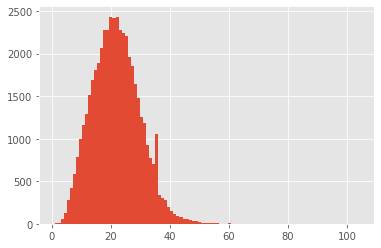

In [17]:
plt.hist([len(s) for s in sentences], bins=100)
plt.show()

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 70

X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=word2idx["PAD"])

y1 = [[tag2idx[w[2]] for w in s] for s in sentences]
y1 = pad_sequences(maxlen=max_len, sequences=y1, padding="post", value=tag2idx["O"])

y2 = [[POS2idx[w[1]] for w in s] for s in sentences]
y2 = pad_sequences(maxlen=max_len, sequences=y2, padding="post", value=POS2idx["PPAD"])

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=1)

In [0]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense, Masking
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

In [21]:
input_word = Input(shape=(max_len,))
model = Embedding(input_dim=num_words, output_dim=50, input_length=max_len)(input_word)
model = Masking(mask_value=word2idx["PAD"])(model)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
tag = TimeDistributed(Dense(num_tags, activation="softmax"),name='tag')(model)
pos = TimeDistributed(Dense(num_POS, activation="softmax"),name='POS')(model)
model = Model(input_word, [tag,pos])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 70)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 70, 50)       1758950     input_1[0][0]                    
__________________________________________________________________________________________________
masking (Masking)               (None, 70, 50)       0           embedding[0][0]                  
__________________________________________________________________________________________________
spatial_dropout1d (SpatialDropo (None, 70, 50)       0           masking[0][0]                    
______________________________________________________________________________________________

In [0]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics="accuracy")

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint
# from livelossplot.tf_keras import PlotLossesCallback

In [24]:
%%time

chkpt = ModelCheckpoint("sentence_tags_pos.h5", monitor='val_loss',verbose=1, save_best_only=True, save_weights_only=True, mode='min')

# early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=1, verbose=0, mode='max', baseline=None, restore_best_weights=False)

callbacks = [chkpt]

history = model.fit(
    x=x_train,
    y=[y1_train,y2_train],
    validation_data=(x_test,[y1_test,y2_test]),
    batch_size=32, 
    epochs=10,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/10
1199/1199 [==============================] - ETA: 0s - loss: 0.6028 - tag_loss: 0.1533 - POS_loss: 0.4494 - tag_accuracy: 0.9656 - POS_accuracy: 0.8783
Epoch 00001: val_loss improved from inf to 0.14176, saving model to sentence_tags_pos.h5
1199/1199 [==============================] - 1115s 930ms/step - loss: 0.6028 - tag_loss: 0.1533 - POS_loss: 0.4494 - tag_accuracy: 0.9656 - POS_accuracy: 0.8783 - val_loss: 0.1418 - val_tag_loss: 0.0633 - val_POS_loss: 0.0785 - val_tag_accuracy: 0.9834 - val_POS_accuracy: 0.9808
Epoch 2/10
1199/1199 [==============================] - ETA: 0s - loss: 0.0934 - tag_loss: 0.0456 - POS_loss: 0.0478 - tag_accuracy: 0.9872 - POS_accuracy: 0.9881
Epoch 00002: val_loss improved from 0.14176 to 0.07848, saving model to sentence_tags_pos.h5
1199/1199 [==============================] - 1109s 925ms/step - loss: 0.0934 - tag_loss: 0.0456 - POS_loss: 0.0478 - tag_accuracy: 0.9872 - POS_accuracy: 0.9881 - val_loss: 0.0785 - val_tag_loss: 0.0411 - val_POS

In [0]:
model.load_weights('/content/sentence_tags_pos.h5')

In [29]:
i = np.random.randint(0, x_test.shape[0]) 
p = model.predict(np.array([x_test[i]]))
p1 = np.argmax(p[0], axis=-1)
p2 = np.argmax(p[1], axis=-1)
y1_true = y1_test[i]
y2_true = y2_test[i]
print("{:15}{:15}\t{:15}\t{:15}\t {}\n".format("Word", "True_tag", "Pred_tag","True_POS","Pred_POS"))
print("-" *80)
for w, true_tag, pred_tag, true_pos, pred_pos in zip(x_test[i], y1_true, p1[0], y2_true, p2[0]):
    print("{:15}{:15}\t{:15}\t{:15}\t {}\n".format(words[w], tags[true_tag], tags[pred_tag], POS[true_pos], POS[pred_pos]))

Word           True_tag       	Pred_tag       	True_POS       	 Pred_POS

--------------------------------------------------------------------------------
Parliamentary  O              	O              	JJ             	 JJ

elections      O              	O              	NNS            	 NNS

are            O              	O              	VBP            	 VBP

set            O              	O              	VBN            	 VBN

for            O              	O              	IN             	 IN

October        B-tim          	B-tim          	NNP            	 NNP

10             I-tim          	I-tim          	CD             	 CD

.              O              	O              	.              	 .

PAD            O              	O              	PPAD           	 PPAD

PAD            O              	O              	PPAD           	 PPAD

PAD            O              	O              	PPAD           	 PPAD

PAD            O              	O              	PPAD           	 PPAD

PAD            O  

In [0]:
!mv /content/sentence_tags_pos.h5 '/content/drive/My Drive/Screencastify'